In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
_URL="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL
,extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [7]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [8]:
labels = ["Cat", "Dog"]
labels_dict = {i: name for i, name in enumerate(labels)}

In [9]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
total_size = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_val = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))

In [11]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

1000
1000


In [12]:
# validation
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

500
500


In [13]:
BATCH_SIZE = 100
IMAGE_SIZE = 150

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
directory=train_dir,shuffle=True,target_size=(IMAGE_SIZE,IMAGE_SIZE),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
test_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                               directory=validation_dir,
                                                               shuffle=False,target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
sample_training_images, _ = next(train_data_gen)

In [18]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

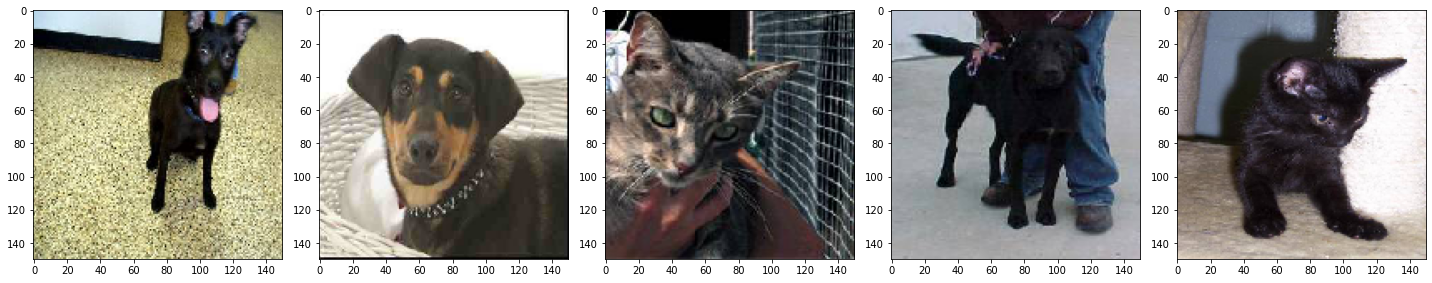

In [19]:
plotImages(sample_training_images[:5])

In [21]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu',
  input_shape=(150,150,3)),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2)
])

In [22]:
#Compiling the Model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [23]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#Train the Model
epochs = 10
history = model.fit_generator(
  train_data_gen,
  steps_per_epoch=int(np.ceil(total_size/float(BATCH_SIZE))),
  epochs=epochs,
  validation_data=test_data_gen,
  validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
 9/20 [============>.................] - ETA: 53s - loss: 0.3845 - accuracy: 0.8311

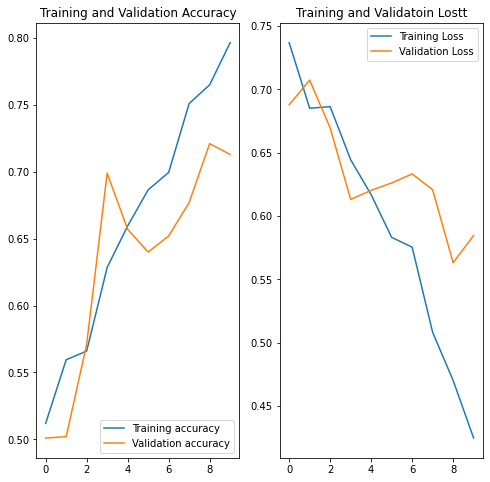

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)

plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc,label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss,label = "Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validatoin Lostt")

plt.show()



In [27]:
test = test_data_gen[0][0][0:]

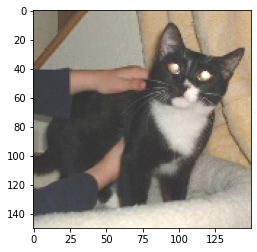

In [28]:
plt.imshow(test[0])

In [29]:
pred = np.argmax(model.predict(test[:1]))

1/1 [==============================] - 0s 182ms/step


In [30]:
labels_dict[pred.astype("int32")]

'Cat'